# **Data Collection & Initial Inspection**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## **Load the dataset**

In [24]:
df = pd.read_csv('drive/MyDrive/diabetes.csv', header=None)

# Assign column names based on dataset documentation
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df.columns = column_names

## **Basic Dataset Overview**

In [25]:
print("\n" + "="*20 + " Dataset Overview " + "="*20)
print(f"Dataset Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())


==================== Dataset Overview ====================
Dataset Shape: (769, 9) (Rows: 769, Columns: 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  

Last 5 rows:
    Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
764          10     101            76            48     180  32.9   
765           2     122     

## **Data Structure Information**

In [26]:
print("\n" + "="*20 + " Data Structure " + "="*20)
print("Data Types:")
print(df.dtypes)
print("\nColumn Names:")
print(df.columns.tolist())


==================== Data Structure ====================
Data Types:
Pregnancies                 object
Glucose                     object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                         object
DiabetesPedigreeFunction    object
Age                         object
Outcome                     object
dtype: object

Column Names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## **Missing Values Analysis**

In [27]:
print("\n" + "="*20 + " Missing Values " + "="*20)
print("Missing Values Count:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print(round(df.isnull().sum() / len(df) * 100, 2))


==================== Missing Values ====================
Missing Values Count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing Values Percentage:
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


## **Basic Statistical Summary**

In [28]:
print("\n" + "="*20 + " Statistical Summary " + "="*20)
print("Descriptive Statistics:")
print(df.describe().T)


==================== Statistical Summary ====================
Descriptive Statistics:
                         count unique    top freq
Pregnancies                769     18      1  135
Glucose                    769    137    100   17
BloodPressure              769     48     70   57
SkinThickness              769     52      0  227
Insulin                    769    187      0  374
BMI                        769    249     32   13
DiabetesPedigreeFunction   769    518  0.258    6
Age                        769     53     22   72
Outcome                    769      3      0  500


## **Unique Value Analysis**

In [29]:
print("\n" + "="*20 + " Unique Values " + "="*20)
print("Number of Unique Values per Column:")
print(df.nunique())


==================== Unique Values ====================
Number of Unique Values per Column:
Pregnancies                  18
Glucose                     137
BloodPressure                48
SkinThickness                52
Insulin                     187
BMI                         249
DiabetesPedigreeFunction    518
Age                          53
Outcome                       3
dtype: int64


## **Class Distribution (Target Variable)**

In [30]:
print("\n" + "="*20 + " Target Distribution " + "="*20)
print("Outcome Class Distribution (0: No Diabetes, 1: Diabetes):")
print(df['Outcome'].value_counts())
print("\nClass Percentage:")
print(round(df['Outcome'].value_counts(normalize=True) * 100, 2))


==================== Target Distribution ====================
Outcome Class Distribution (0: No Diabetes, 1: Diabetes):
Outcome
0          500
1          268
Outcome      1
Name: count, dtype: int64

Class Percentage:
Outcome
0          65.02
1          34.85
Outcome     0.13
Name: proportion, dtype: float64


## **Zero Value Analysis**

In [31]:
print("\n" + "="*20 + " Zero Value Analysis " + "="*20)
zero_analysis = pd.DataFrame({
    'Columns': ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
    'Zero Count': [
        (df['Glucose'] == 0).sum(),
        (df['BloodPressure'] == 0).sum(),
        (df['SkinThickness'] == 0).sum(),
        (df['Insulin'] == 0).sum(),
        (df['BMI'] == 0).sum()
    ]
})
zero_analysis['Zero Percentage'] = round(zero_analysis['Zero Count'] / len(df) * 100, 2)
print(zero_analysis)


==================== Zero Value Analysis ====================
         Columns  Zero Count  Zero Percentage
0        Glucose           0              0.0
1  BloodPressure           0              0.0
2  SkinThickness           0              0.0
3        Insulin           0              0.0
4            BMI           0              0.0


## **Memory Usage**

In [32]:
print("\n" + "="*20 + " Memory Usage " + "="*20)
print(f"Total Memory Usage: {df.memory_usage().sum() / 1024:.2f} KB")


==================== Memory Usage ====================
Total Memory Usage: 54.20 KB


## **Initial Observations Report**

In [33]:
print("\n" + "="*20 + " Initial Observations " + "="*20)
print("1. Dataset contains 769 rows and 9 columns")
print("2. No missing values detected in any column (NaN values)")
print("3. All columns are currently stored as object type — likely due to header duplication in the first row")
print("4. Some biological features contain zero values likely representing missing data:")
print("   - Insulin: 374 zeros (~48.6%)")
print("   - SkinThickness: 227 zeros (~29.5%)")
print("   - Glucose: suspected but not counted as zero values in this summary")
print("5. Outcome class imbalance:")
print("   - No Diabetes (class 0): 65.02%")
print("   - Diabetes (class 1): 34.85%")
print("6. Target column 'Outcome' contains an unexpected third value — requires validation")
print("7. All features are expected to be numerical but need type conversion due to import issues")
print("8. Potential data quality concerns:")
print("   - Duplicate header row found at index 0 — should be removed")
print("   - Zero values in physiological metrics may require imputation or exclusion")


==================== Initial Observations ====================
1. Dataset contains 769 rows and 9 columns
2. No missing values detected in any column (NaN values)
3. All columns are currently stored as object type — likely due to header duplication in the first row
4. Some biological features contain zero values likely representing missing data:
   - Insulin: 374 zeros (~48.6%)
   - SkinThickness: 227 zeros (~29.5%)
   - Glucose: suspected but not counted as zero values in this summary
5. Outcome class imbalance:
   - No Diabetes (class 0): 65.02%
   - Diabetes (class 1): 34.85%
6. Target column 'Outcome' contains an unexpected third value — requires validation
7. All features are expected to be numerical but need type conversion due to import issues
8. Potential data quality concerns:
   - Duplicate header row found at index 0 — should be removed
   - Zero values in physiological metrics may require imputation or exclusion


## **VISUAL INSPECTION**

In [34]:
print("\n" + "="*50)
print("VISUAL DATA INSPECTION")
print("="*50)
plt.figure(figsize=(15, 12))


VISUAL DATA INSPECTION


<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>


Feature Distributions:


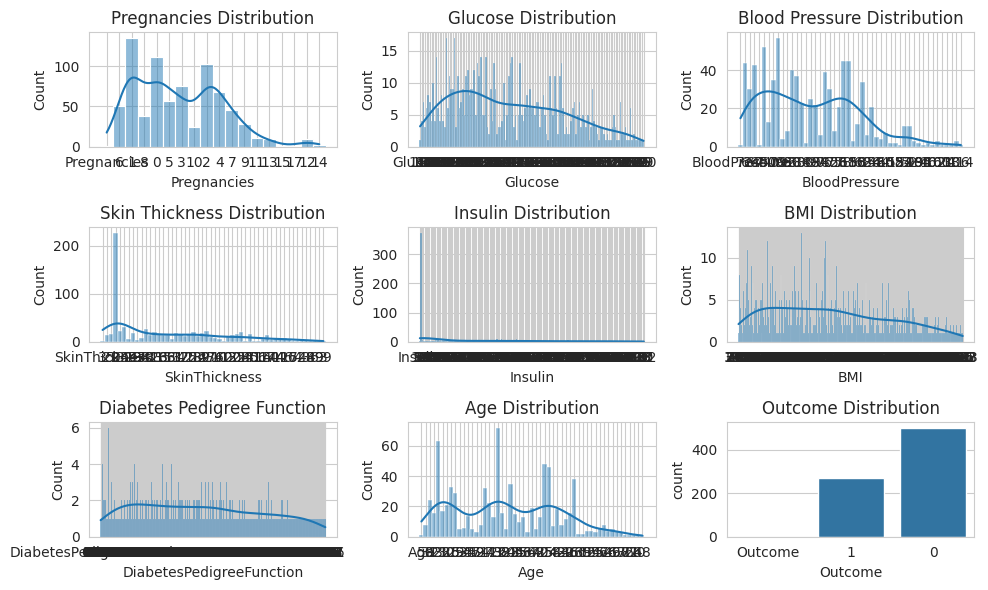

In [35]:
# 1. Feature Distributions
print("\nFeature Distributions:")
plt.subplot(3, 3, 1)
sns.histplot(df['Pregnancies'], bins=20, kde=True)
plt.title('Pregnancies Distribution')

plt.subplot(3, 3, 2)
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title('Glucose Distribution')

plt.subplot(3, 3, 3)
sns.histplot(df['BloodPressure'], bins=20, kde=True)
plt.title('Blood Pressure Distribution')

plt.subplot(3, 3, 4)
sns.histplot(df['SkinThickness'], bins=20, kde=True)
plt.title('Skin Thickness Distribution')

plt.subplot(3, 3, 5)
sns.histplot(df['Insulin'], bins=20, kde=True)
plt.title('Insulin Distribution')

plt.subplot(3, 3, 6)
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')

plt.subplot(3, 3, 7)
sns.histplot(df['DiabetesPedigreeFunction'], bins=20, kde=True)
plt.title('Diabetes Pedigree Function')

plt.subplot(3, 3, 8)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(3, 3, 9)
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.tight_layout()
plt.show()


Feature Distributions (Boxplots):


<Figure size 1500x1000 with 0 Axes>

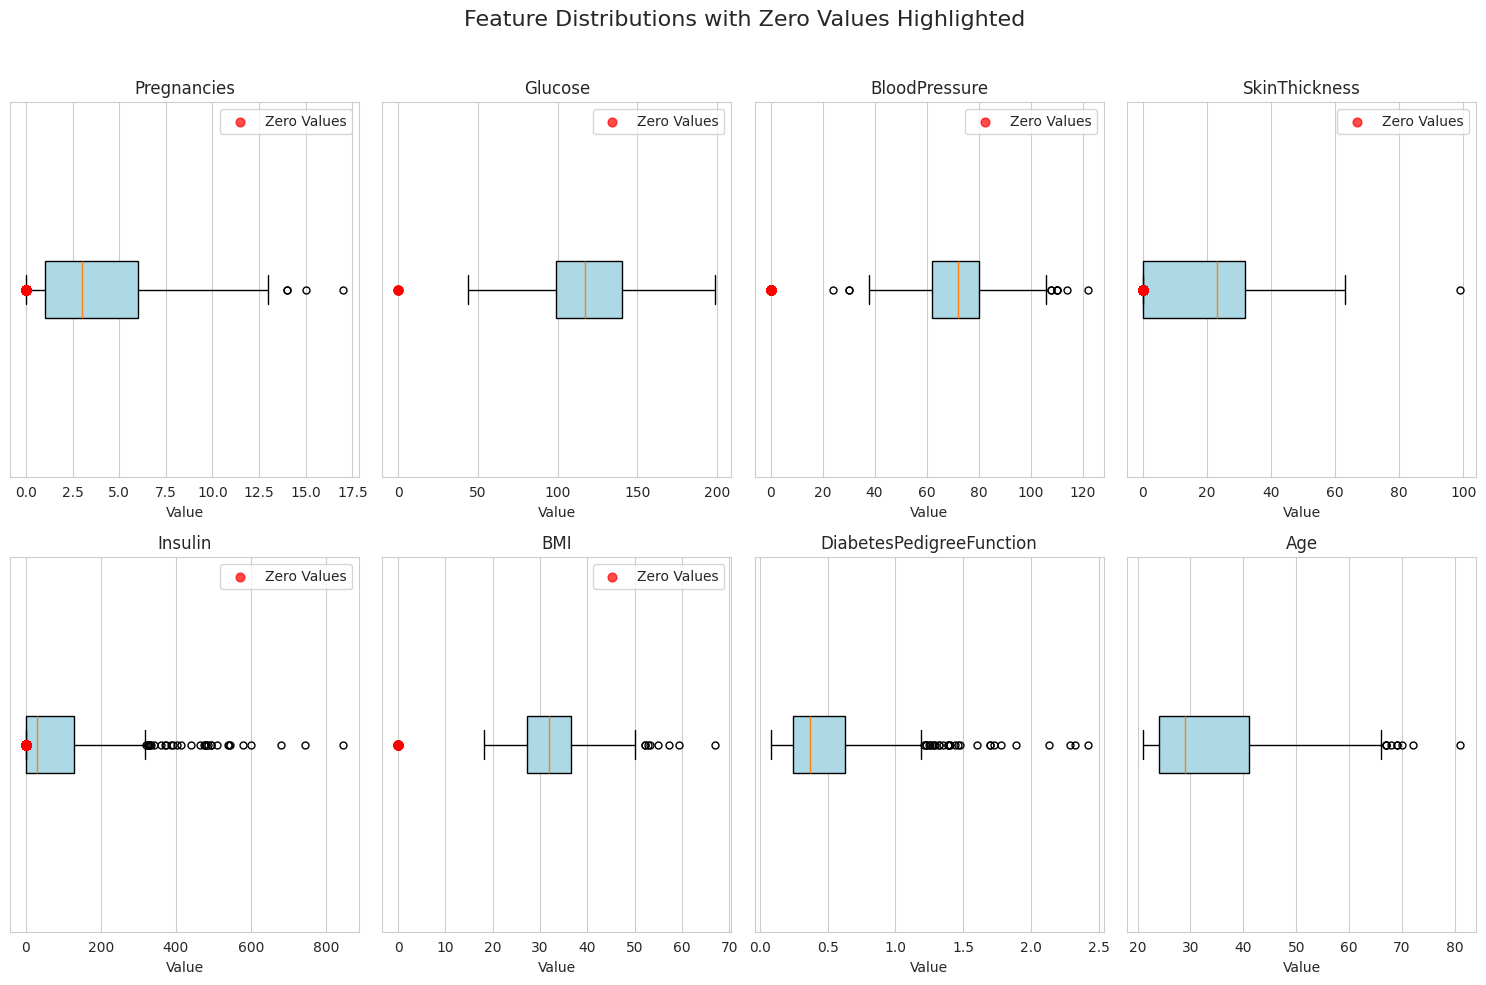

In [36]:
# 2. Boxplots for Feature Distributions
print("\nFeature Distributions (Boxplots):")
plt.figure(figsize=(15, 10))

# Define numeric features (all except Outcome)
numeric_features = [col for col in df.columns if col != 'Outcome']

# Convert to numeric types (safe conversion)
numeric_df = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Create figure and axes explicitly
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes_flat = axes.flatten()  # Flatten to 1D array

# Plot each feature separately
for i, feature in enumerate(numeric_features):
    # Create boxplot
    bp = axes_flat[i].boxplot(
        numeric_df[feature].dropna(),
        vert=False,
        patch_artist=True,
        flierprops=dict(marker='o', markersize=5)
    )

    # Style boxes
    for box in bp['boxes']:
        box.set_facecolor('lightblue')

    # Highlight zero values
    zero_values = numeric_df[feature][numeric_df[feature] == 0]
    if not zero_values.empty:
        # Create positions at the median line
        positions = np.ones(len(zero_values))
        axes_flat[i].scatter(zero_values, positions,
                         color='red',
                         alpha=0.7,
                         s=40,
                         label='Zero Values',
                         zorder=3)  # Ensure dots appear on top

    axes_flat[i].set_title(feature)
    axes_flat[i].set_xlabel('Value')
    axes_flat[i].set_yticks([])  # Hide y-axis ticks

    if not zero_values.empty:
        axes_flat[i].legend(loc='upper right')

# Hide any unused subplots
for j in range(len(numeric_features), len(axes_flat)):
    axes_flat[j].axis('off')

plt.suptitle('Feature Distributions with Zero Values Highlighted', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
plt.show()

Missing values in Outcome before cleaning: 0
Error converting Outcome: invalid literal for int() with base 10: 'Outcome'

Final Data Types:
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

=== Visualizations ===


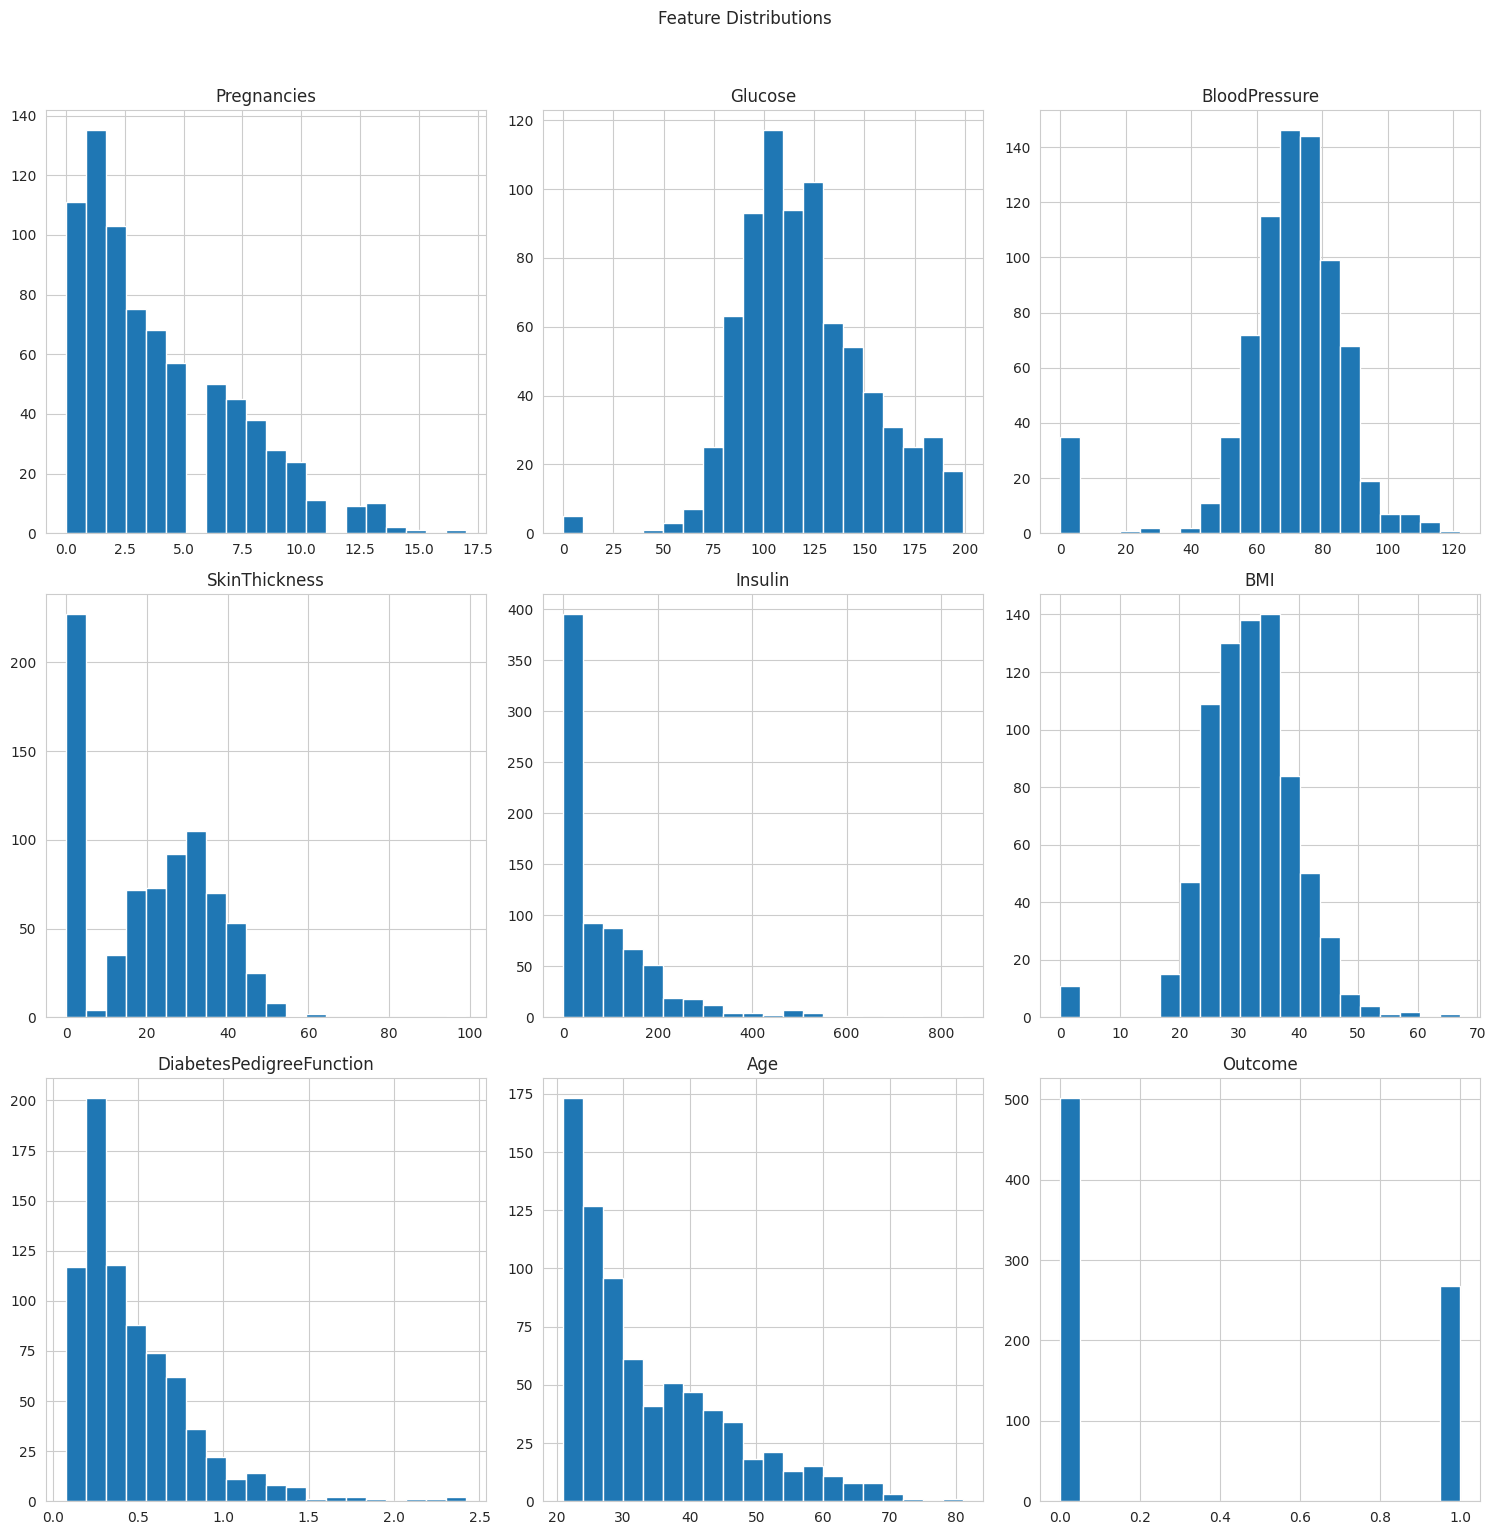

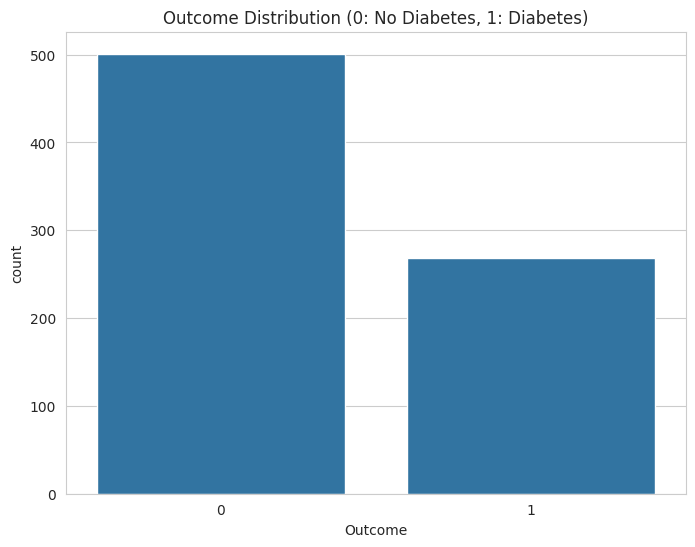

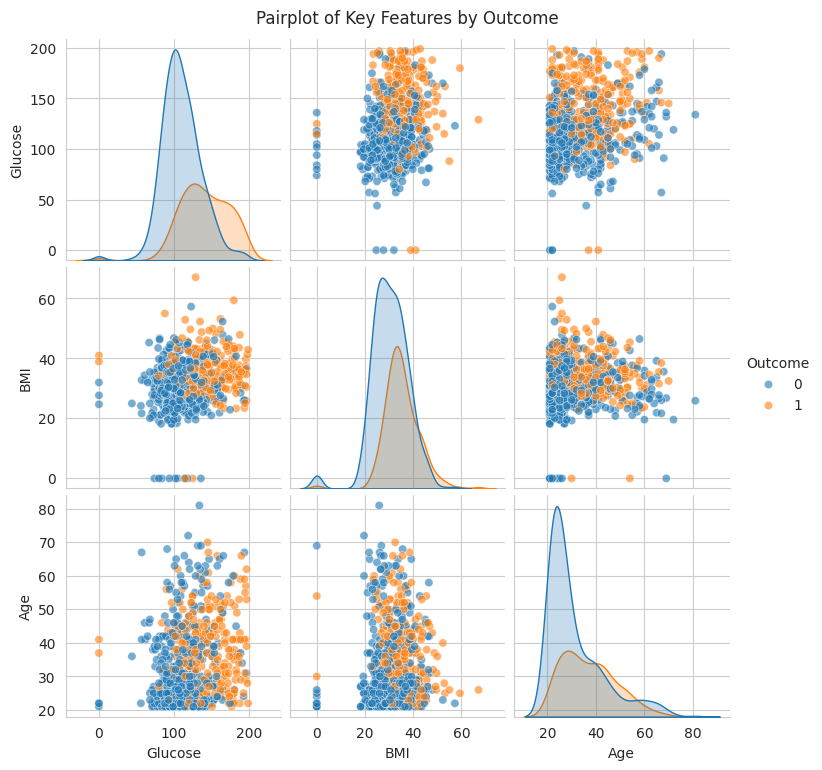

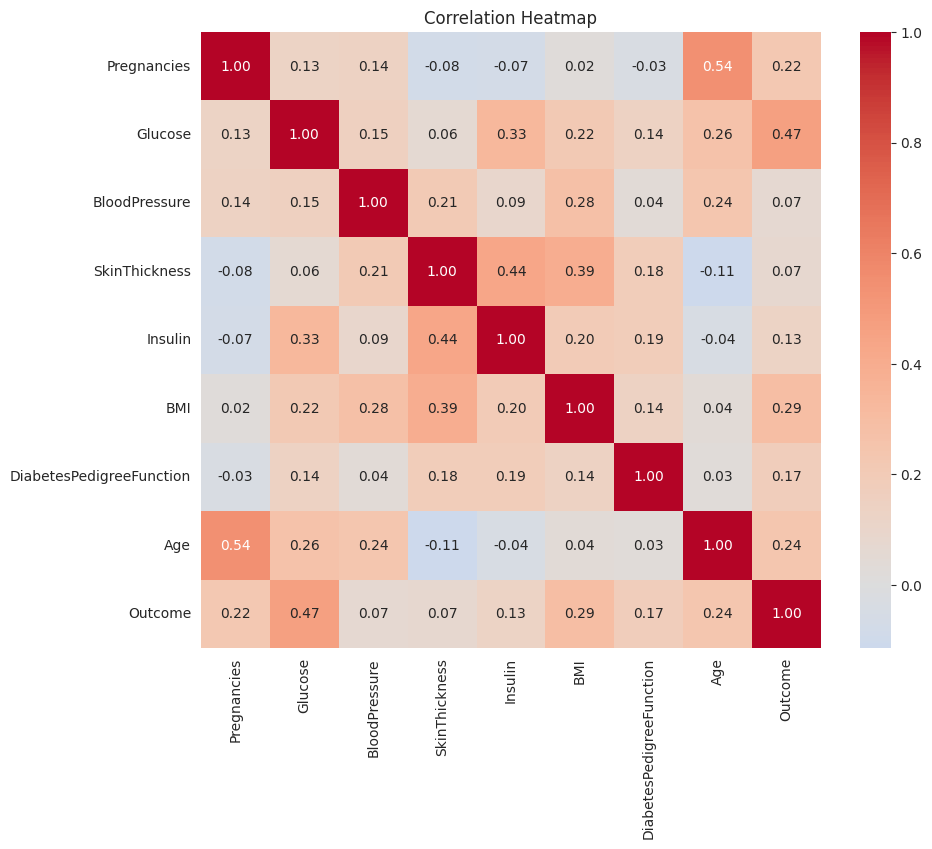

In [37]:
# ==============================
# DATA CLEANING & TYPE CONVERSION
# ==============================

# 1. Handle missing values in Outcome
print("Missing values in Outcome before cleaning:", df['Outcome'].isna().sum())
df = df.dropna(subset=['Outcome'])  # Remove rows with missing Outcome

# 2. Convert Outcome to integer
try:
    df['Outcome'] = df['Outcome'].astype(int)
except Exception as e:
    print(f"Error converting Outcome: {e}")
    # Handle non-integer values
    df['Outcome'] = pd.to_numeric(df['Outcome'], errors='coerce')
    df['Outcome'] = df['Outcome'].fillna(0).astype(int)  # Fill remaining NaNs with 0

# 3. Convert all other columns to numeric
for col in df.columns:
    if col == 'Outcome':
        continue  # Already handled

    # Skip if already numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        continue

    # Attempt conversion to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Report final data types
print("\nFinal Data Types:")
print(df.dtypes)

# ==============================
# VISUALIZATIONS
# ==============================
print("\n=== Visualizations ===")

# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# 1. Histograms of all features
if len(numeric_cols) > 0:
    # Determine grid size (3x3 for 9 features, adjust as needed)
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    df[numeric_cols].hist(bins=20, figsize=(15, 5*n_rows), layout=(n_rows, n_cols))
    plt.suptitle('Feature Distributions', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns available for histograms")

# 2. Outcome distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution (0: No Diabetes, 1: Diabetes)')
plt.show()

# 3. Pairplot of selected features
selected_features = ['Glucose', 'BMI', 'Age', 'Outcome']
if set(selected_features).issubset(df.columns):
    sns.pairplot(df[selected_features], hue='Outcome', diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot of Key Features by Outcome', y=1.02)
    plt.show()
else:
    missing = set(selected_features) - set(df.columns)
    print(f"Missing columns: {missing}")

# 4. Correlation heatmap
if len(numeric_cols) > 0:
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr()

    # Only plot if we have a valid correlation matrix
    if not corr.empty:
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
        plt.title('Correlation Heatmap')
        plt.show()
    else:
        print("Correlation matrix is empty")
else:
    print("No numeric columns for correlation matrix")

# **Handle Zero Values in Biological Features**

In [38]:
# Identify columns with biological zeros
bio_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN (since they represent missing measurements)
for col in bio_columns:
    df[col] = df[col].replace(0, np.nan)

# Report new missing values
print("\nMissing Values After Handling Zeros:")
print(df.isnull().sum())


Missing Values After Handling Zeros:
Pregnancies                   1
Glucose                       6
BloodPressure                36
SkinThickness               228
Insulin                     375
BMI                          12
DiabetesPedigreeFunction      1
Age                           1
Outcome                       0
dtype: int64


# **Impute Missing Values**

In [39]:
from sklearn.impute import KNNImputer

# Initialize imputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Convert back to proper data types
for col in df_imputed.columns:
    if col == 'Outcome':
        df_imputed[col] = df_imputed[col].astype(int)
    else:
        df_imputed[col] = df_imputed[col].astype(float)

print("\nMissing Values After Imputation:")
print(df_imputed.isnull().sum())


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **Handle Outliers**

In [40]:
# Identify and cap outliers using IQR method
for col in numeric_cols:
    if col != 'Outcome':
        Q1 = df_imputed[col].quantile(0.25)
        Q3 = df_imputed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_imputed[col] = np.where(df_imputed[col] < lower_bound, lower_bound, df_imputed[col])
        df_imputed[col] = np.where(df_imputed[col] > upper_bound, upper_bound, df_imputed[col])

# **Feature Engineering**

In [41]:
# Create new features
df_imputed['Glucose_BMI_Ratio'] = df_imputed['Glucose'] / df_imputed['BMI']
df_imputed['Age_Glucose_Product'] = df_imputed['Age'] * df_imputed['Glucose']
df_imputed['BloodPressure_Age_Ratio'] = df_imputed['BloodPressure'] / df_imputed['Age']

# Create BMI categories
df_imputed['BMI_Category'] = pd.cut(df_imputed['BMI'],
                                   bins=[0, 18.5, 25, 30, 100],
                                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create age groups
df_imputed['Age_Group'] = pd.cut(df_imputed['Age'],
                                bins=[0, 30, 45, 60, 100],
                                labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# **Advanced Visualizations**


Violin Plots by Outcome:


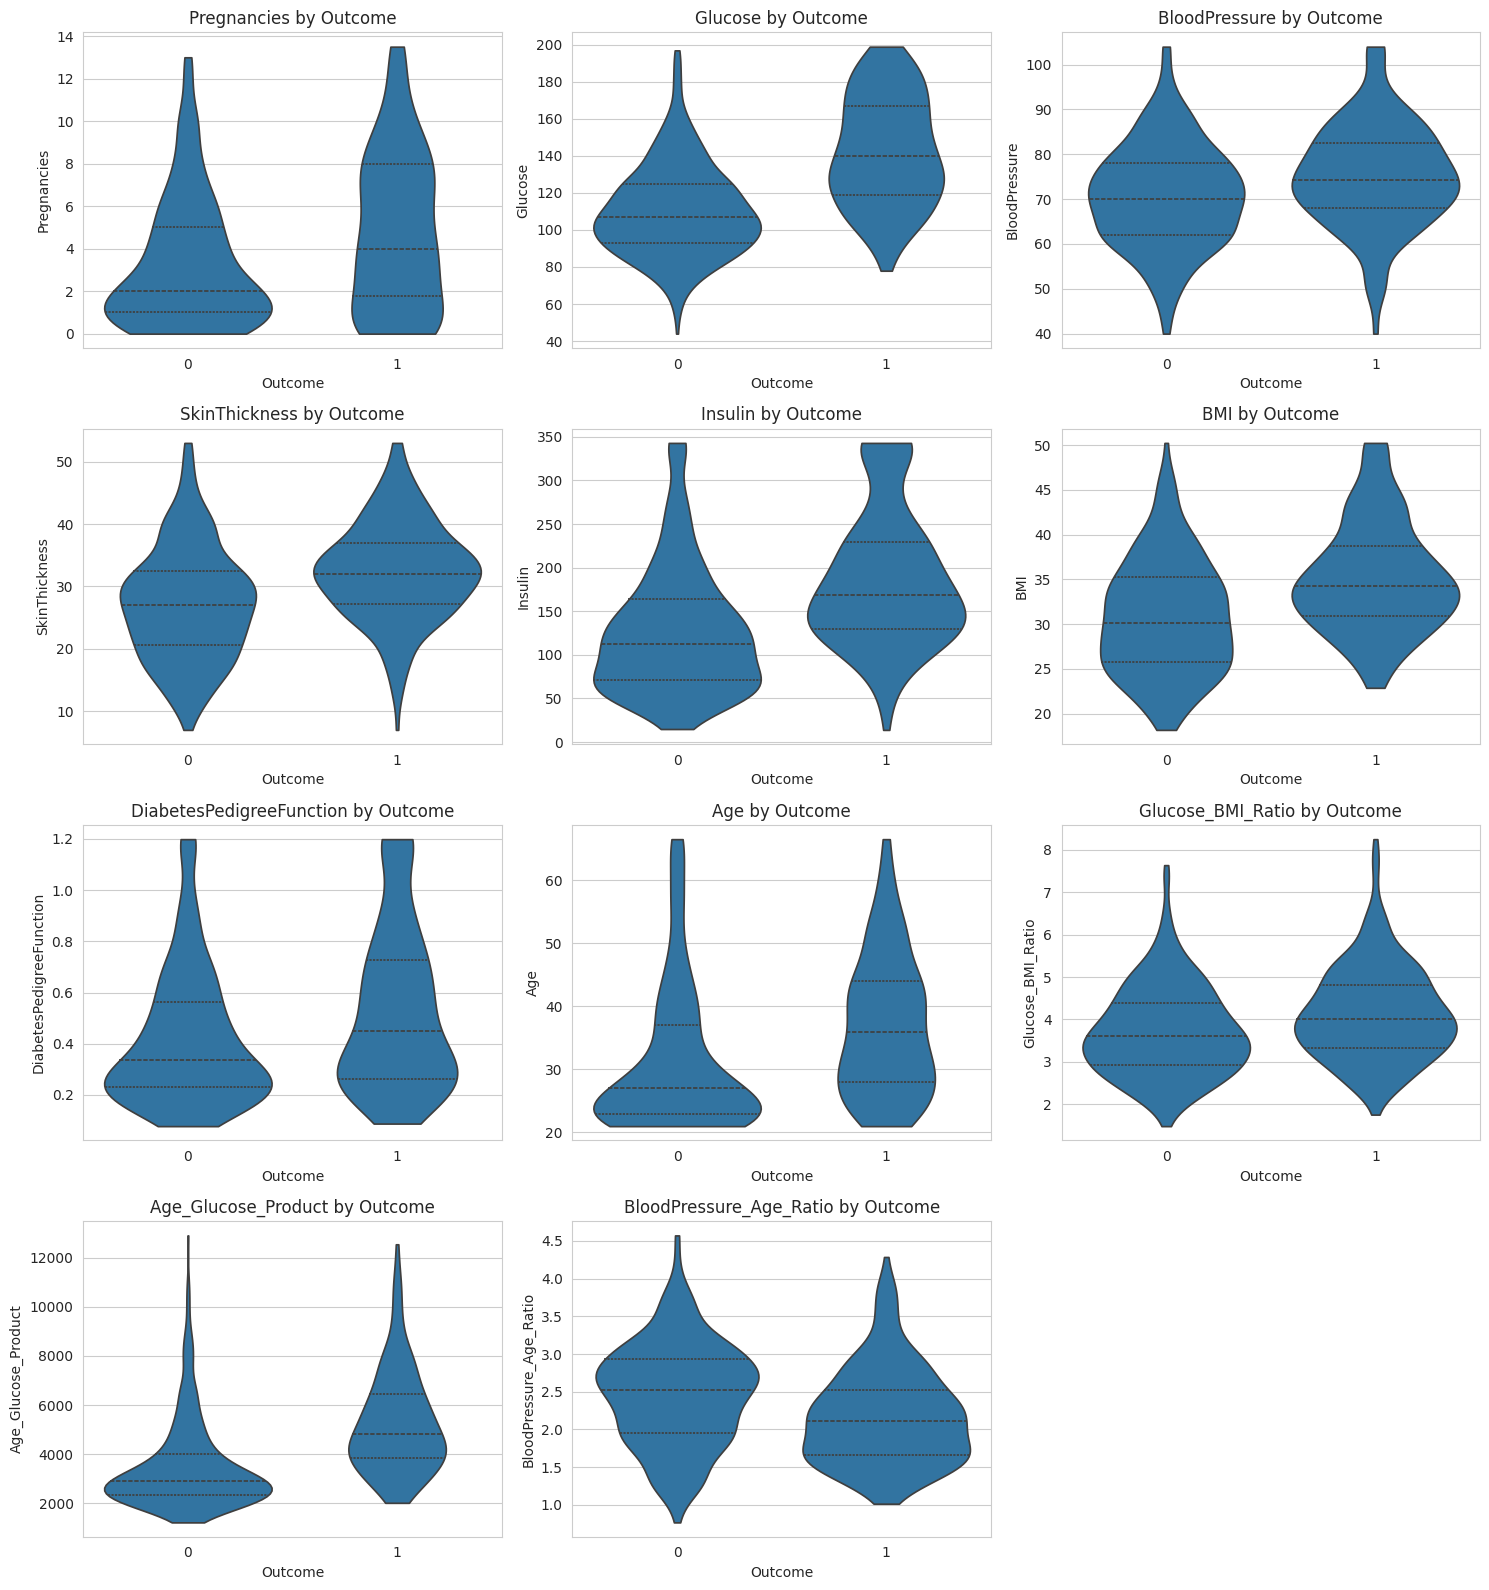


Pairplot with Engineered Features:


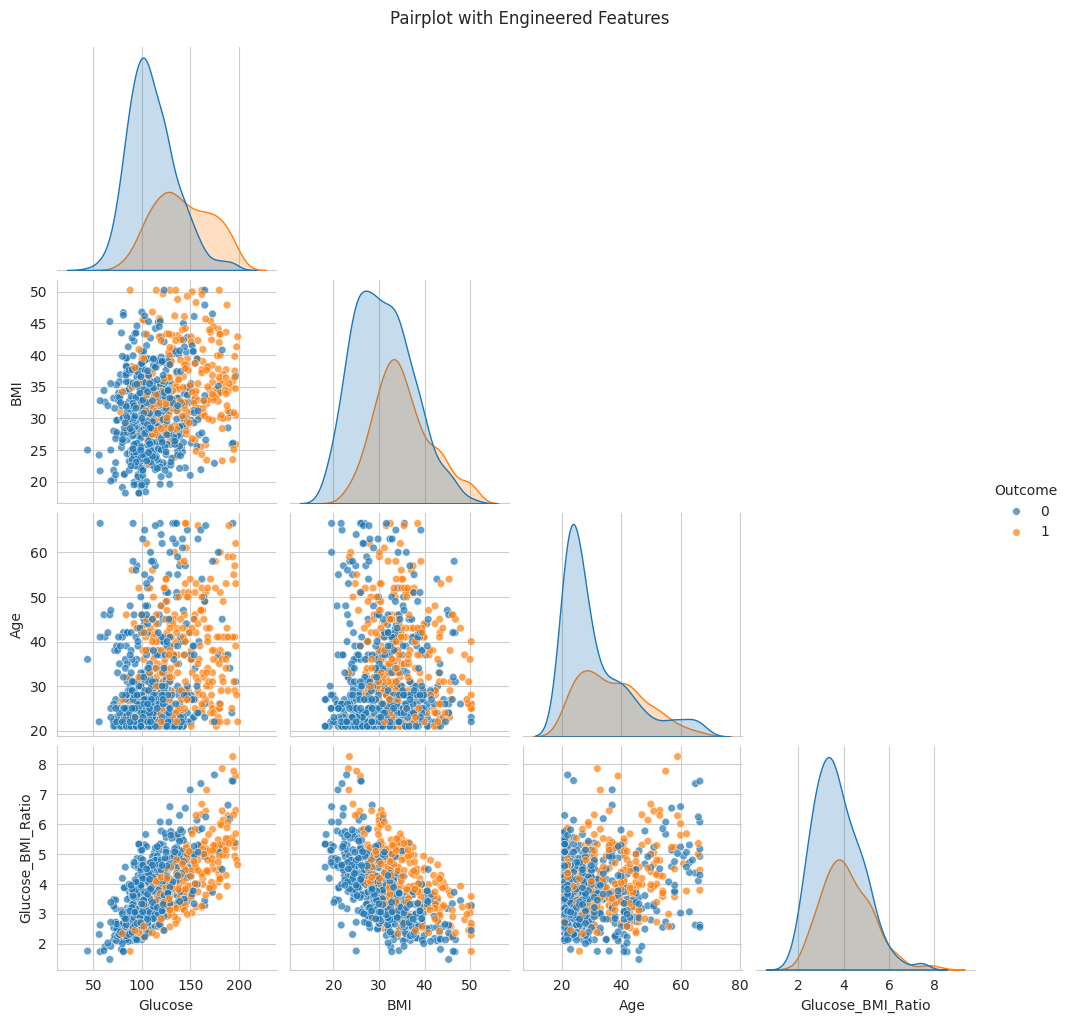


Enhanced Correlation Matrix:


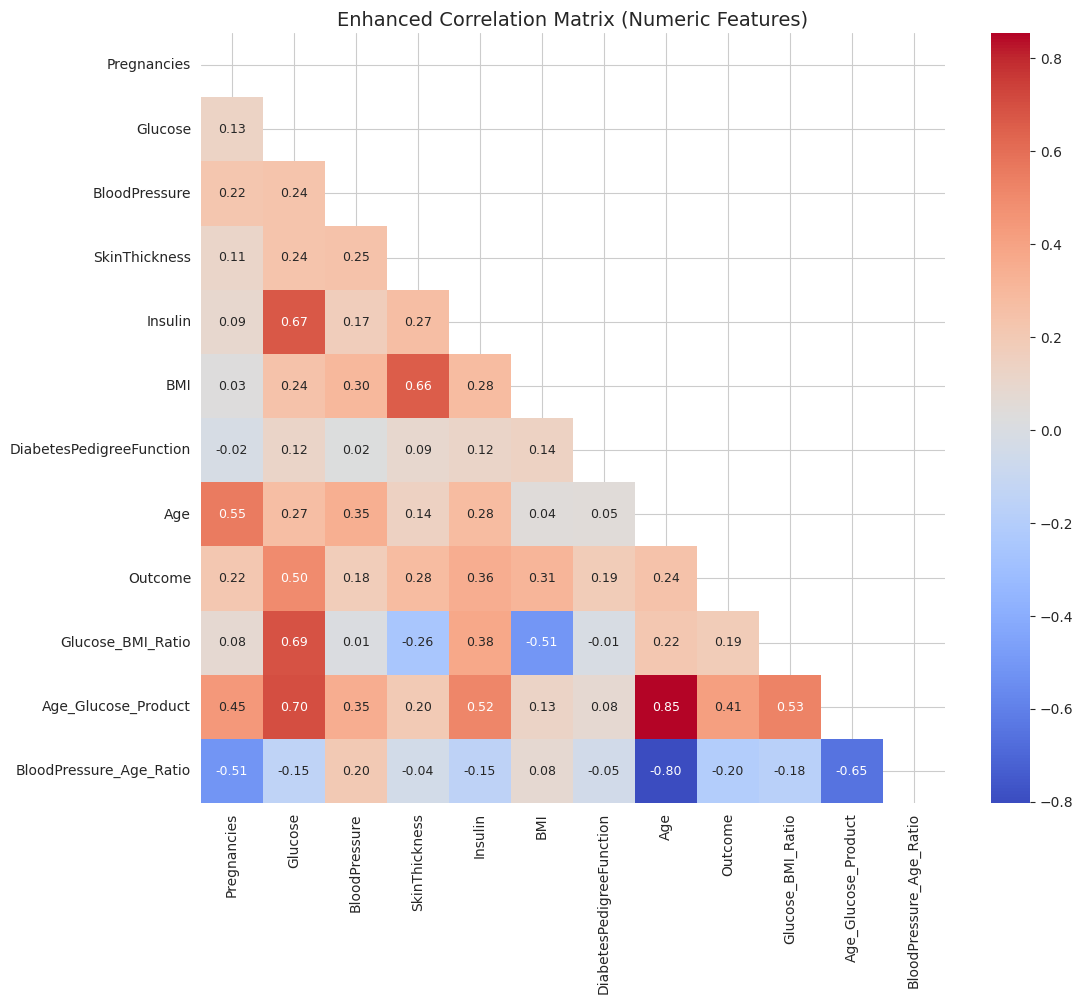


BMI Category Analysis:


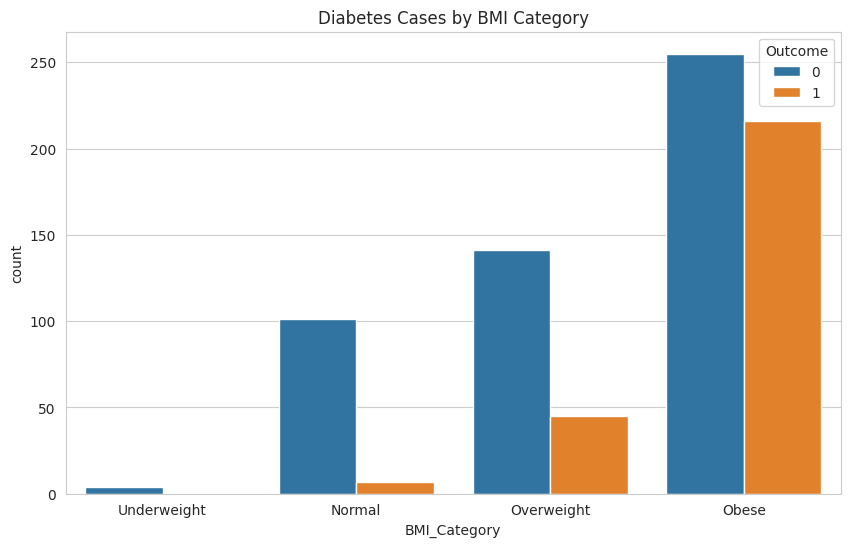


Age Group Analysis:


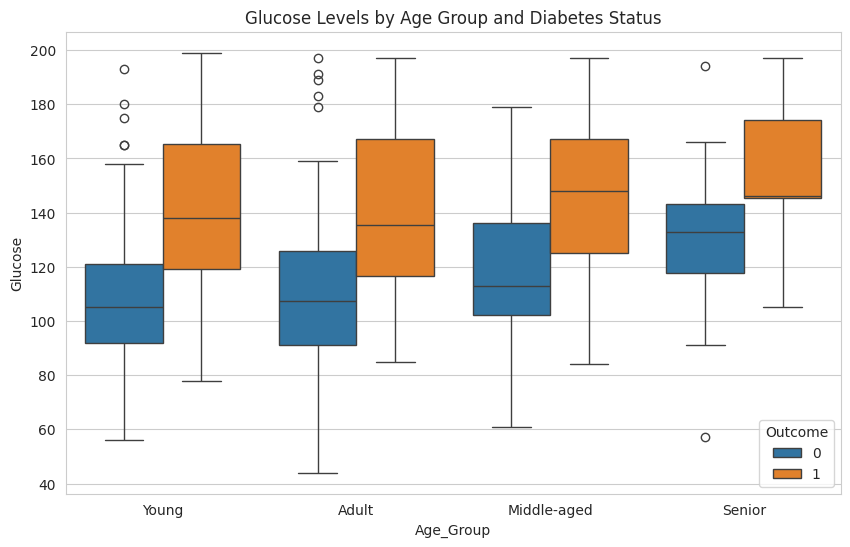

In [48]:
# 1. Violin plots for feature distributions by outcome
print("\nViolin Plots by Outcome:")
numeric_cols = df_imputed.select_dtypes(include=np.number).columns
features_to_plot = [col for col in numeric_cols if col != 'Outcome']
num_features = len(features_to_plot)

# Calculate grid size
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols  # Ceiling division

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i+1)
    sns.violinplot(x='Outcome', y=col, data=df_imputed, cut=0, inner='quartile')
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()

# 2. Scatter matrix with new features
print("\nPairplot with Engineered Features:")
selected_features = ['Glucose', 'BMI', 'Age', 'Glucose_BMI_Ratio', 'Outcome']
if set(selected_features).issubset(df_imputed.columns):
    sns.pairplot(df_imputed[selected_features],
                 hue='Outcome',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.7, 's': 30},
                 corner=True)
    plt.suptitle('Pairplot with Engineered Features', y=1.02)
    plt.show()
else:
    missing = set(selected_features) - set(df_imputed.columns)
    print(f"Missing columns: {missing}")

# 3. Correlation heatmap (numeric only)
print("\nEnhanced Correlation Matrix:")
plt.figure(figsize=(12, 10))
corr_df = df_imputed.select_dtypes(include=np.number)
corr = corr_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size':9})
plt.title('Enhanced Correlation Matrix (Numeric Features)', fontsize=14)
plt.show()

# 4. Additional: Categorical feature analysis
if 'BMI_Category' in df_imputed:
    print("\nBMI Category Analysis:")
    plt.figure(figsize=(10, 6))
    sns.countplot(x='BMI_Category', hue='Outcome', data=df_imputed)
    plt.title('Diabetes Cases by BMI Category')
    plt.show()

if 'Age_Group' in df_imputed:
    print("\nAge Group Analysis:")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Age_Group', y='Glucose', hue='Outcome', data=df_imputed)
    plt.title('Glucose Levels by Age Group and Diabetes Status')
    plt.show()

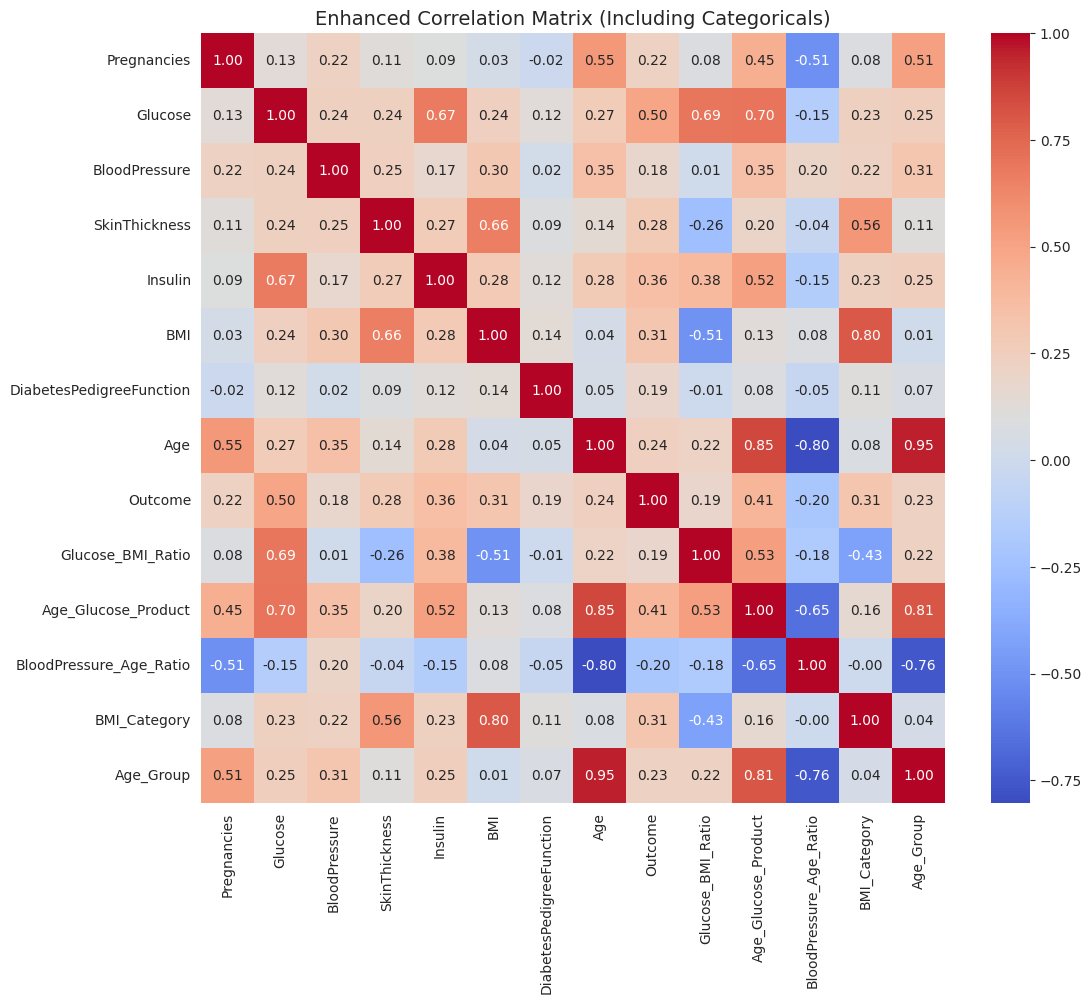

In [43]:
# Create copy for correlation with categoricals
df_corr = df_imputed.copy()

# Convert categoricals to numeric codes
if 'BMI_Category' in df_corr:
    df_corr['BMI_Category'] = df_corr['BMI_Category'].cat.codes
if 'Age_Group' in df_corr:
    df_corr['Age_Group'] = df_corr['Age_Group'].cat.codes

# Now plot correlation
plt.figure(figsize=(12, 10))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size':10})
plt.title('Enhanced Correlation Matrix (Including Categoricals)', fontsize=14)
plt.show()

# **Statistical Analysis**

In [46]:
from scipy.stats import ttest_ind

# T-tests for feature significance
print("\nT-Test Results (Diabetic vs Non-Diabetic):")
for col in numeric_cols:
    if col != 'Outcome':
        non_diabetic = df_imputed[df_imputed['Outcome'] == 0][col]
        diabetic = df_imputed[df_imputed['Outcome'] == 1][col]

        t_stat, p_val = ttest_ind(non_diabetic, diabetic, nan_policy='omit')
        print(f"{col}: t-stat = {t_stat:.4f}, p-value = {p_val:.6f} {'*' if p_val < 0.05 else ''}")


T-Test Results (Diabetic vs Non-Diabetic):
Pregnancies: t-stat = -6.2289, p-value = 0.000000 *
Glucose: t-stat = -15.8261, p-value = 0.000000 *
BloodPressure: t-stat = -5.0688, p-value = 0.000001 *
SkinThickness: t-stat = -8.0952, p-value = 0.000000 *
Insulin: t-stat = -10.5304, p-value = 0.000000 *
BMI: t-stat = -9.1809, p-value = 0.000000 *
DiabetesPedigreeFunction: t-stat = -5.2209, p-value = 0.000000 *
Age: t-stat = -6.8959, p-value = 0.000000 *
Glucose_BMI_Ratio: t-stat = -5.2327, p-value = 0.000000 *
Age_Glucose_Product: t-stat = -12.6317, p-value = 0.000000 *
BloodPressure_Age_Ratio: t-stat = 5.6922, p-value = 0.000000 *


# **Multivariate Analysis**

/tmp/ipython-input-47-1110447583.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='BMI_Category', y='Glucose', hue='Outcome',


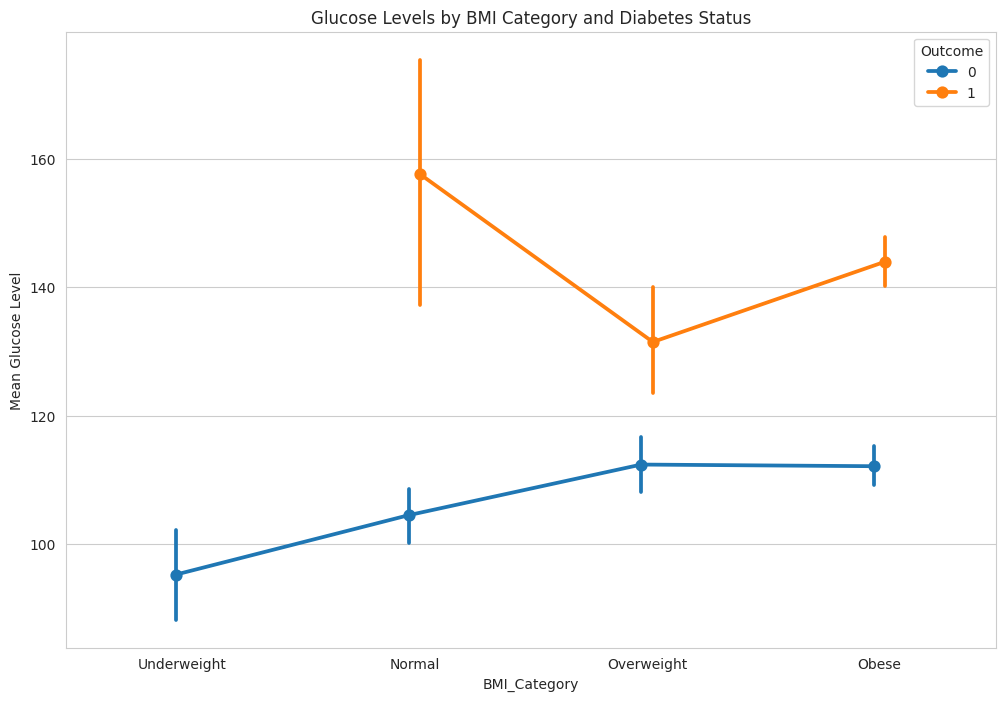

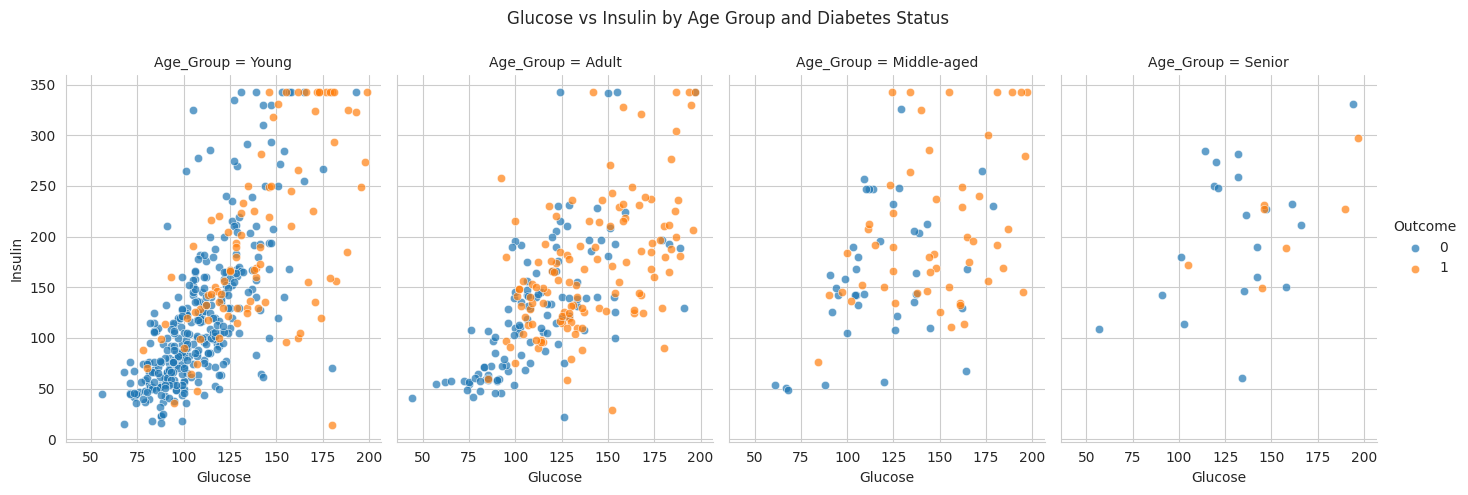

In [47]:
# Interaction plots
plt.figure(figsize=(12, 8))
sns.pointplot(x='BMI_Category', y='Glucose', hue='Outcome',
              data=df_imputed, ci=95, dodge=True)
plt.title('Glucose Levels by BMI Category and Diabetes Status')
plt.ylabel('Mean Glucose Level')
plt.show()

# FacetGrid by age groups
g = sns.FacetGrid(df_imputed, col='Age_Group', hue='Outcome', height=5, aspect=0.7)
g.map(sns.scatterplot, 'Glucose', 'Insulin', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Glucose vs Insulin by Age Group and Diabetes Status')
plt.show()